In [3]:
#Lab 1 Machine Learning data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#1. Read the dataset
dataset=pd.read_csv("/content/Cost_of_Living_Index_by_Country_2024(1).csv")
dataset

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
...,...,...,...,...,...,...,...,...
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0


In [4]:
dataset.shape

(121, 8)

In [9]:
dataset.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [5]:
dataset.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [34]:
x_value = dataset.iloc[0:121, 2:3]

In [35]:
y_value = dataset.iloc[0:121, 3:4]

In [36]:
x_value.columns = ['Cost of Living Index']


In [37]:
y_value.columns = ['Rent Index']

<Axes: >

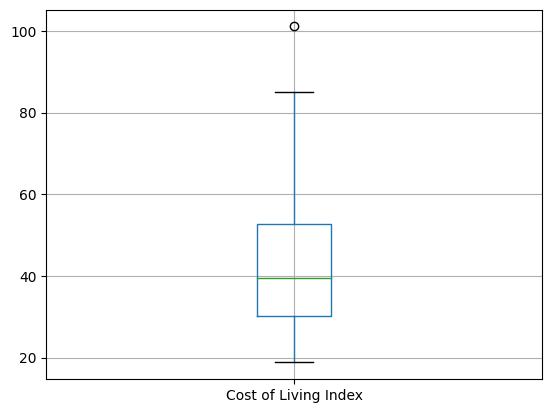

In [39]:
x_value.boxplot(column=['Cost of Living Index'])

<Axes: >

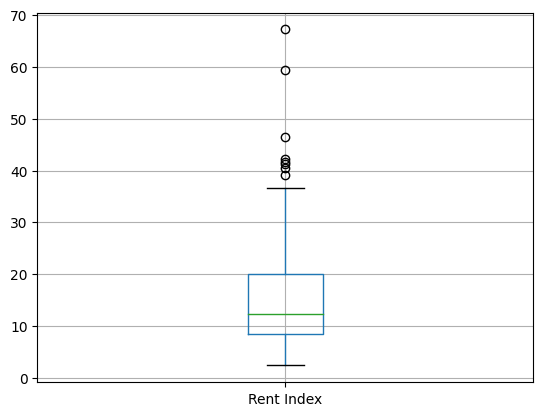

In [40]:
y_value.boxplot(column=['Rent Index'])

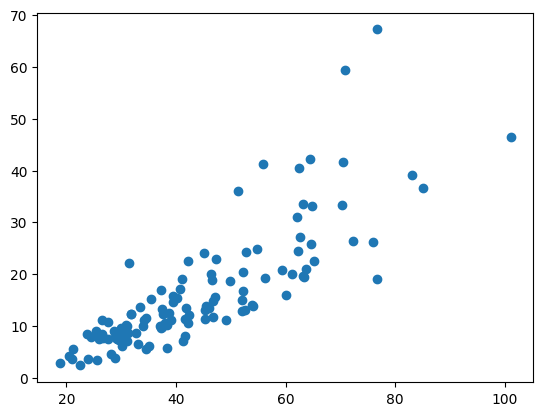

In [41]:
plt.scatter(x_value,y_value)

In [42]:
#cleanning the datasets
clean_dataset=dataset.dropna()

In [43]:
clean_dataset.shape

(121, 8)

In [44]:
x_feature=clean_dataset['Cost of Living Index']
y_feature=clean_dataset['Rent Index']

In [45]:
##ML Model
def hypothesis(theta_array,x):
  return (theta_array[0] + theta_array[1]*x_value)

In [46]:
def costfunction(theta_array,x,y,m):
  total_cost = 0
  for i in range(m):
    total_cost+=((theta_array[0]+theta_array[1]*x[i])-y[i])**2
  return total_cost/(2*m)

In [47]:
def gradient_descent(theta_array,x,y,m,alpha):
  summation_0=0
  summation_1=0
  for i in range(m):
    summation_0+=((theta_array[0]+ theta_array[1]*x[i])-y[i])
    summation_1+=(((theta_array[0]+ theta_array[1]*x[i])-y[i])*x[i])

  new_theta0=theta_array[0] -(summation_0*alpha/m)
  new_theta1=theta_array[1] -(summation_1*alpha/m)
  improvised_theta=[new_theta0,new_theta1]
  #print(improvised_theta)
  return improvised_theta

In [48]:
def training(x, y, alpha, epochs):
  theta_0=0
  theta_1=0
  m=x.size
  cost_values=[]
  theta_array=[theta_0,theta_1]
  for i in range(epochs):
    theta_array=gradient_descent(theta_array,x,y,m,alpha)
    loss=costfunction(theta_array,x, y, m)
    cost_values.append(loss)
    y_new=theta_array[0]+theta_array[1]*x
    plt.scatter(x,y)
    plt.plot(x,y_new,'r')
    plt.show()

  x=np.arange(epochs)
  plt.plot(x,cost_values)
  plt.show()

In [53]:
alpha=0.001
epochs=500

In [50]:
type(x_feature)

pandas.core.series.Series

In [51]:
x_feature=x_feature.values.reshape(x_feature.size)
y_feature=y_feature.values.reshape(y_feature.size)

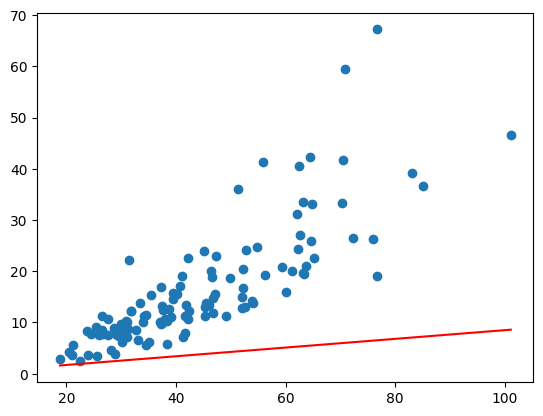

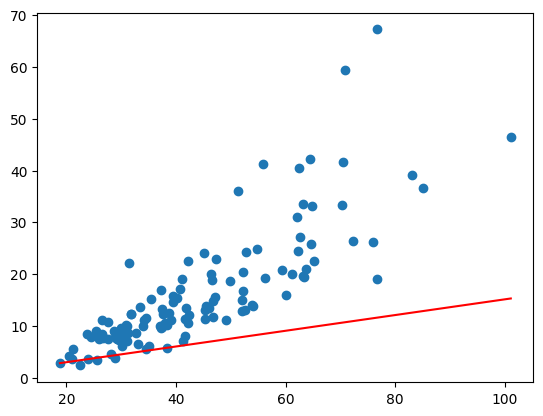

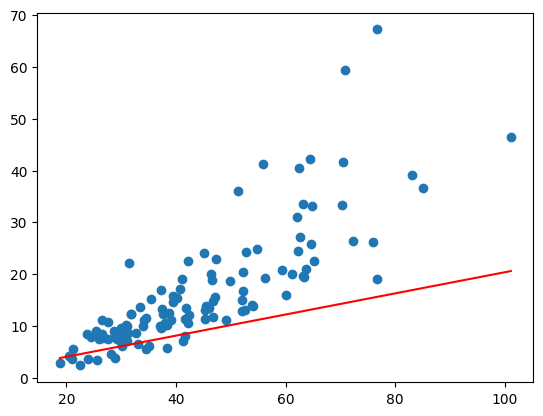

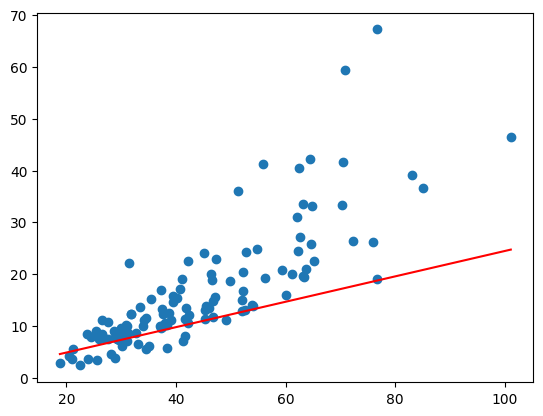

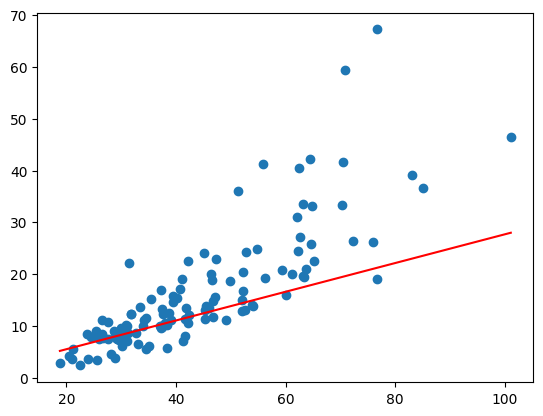

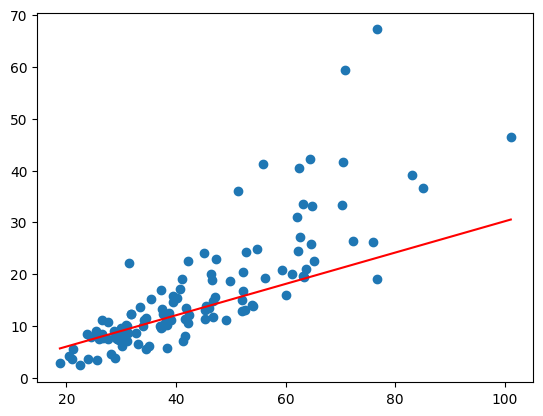

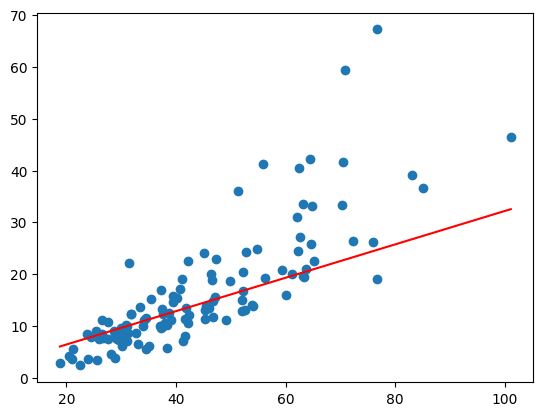

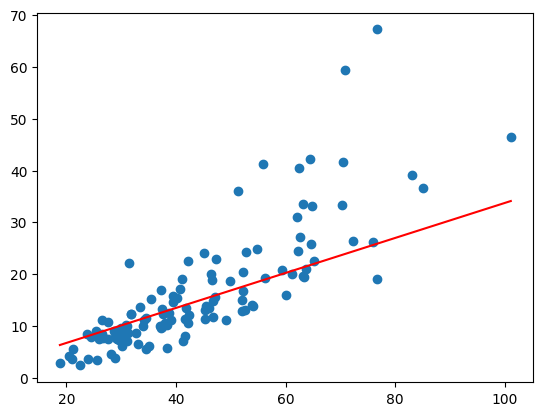

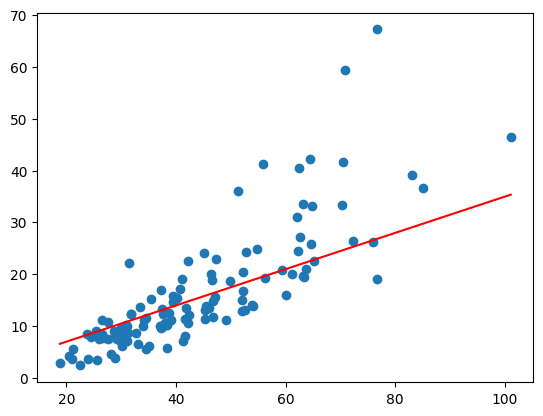

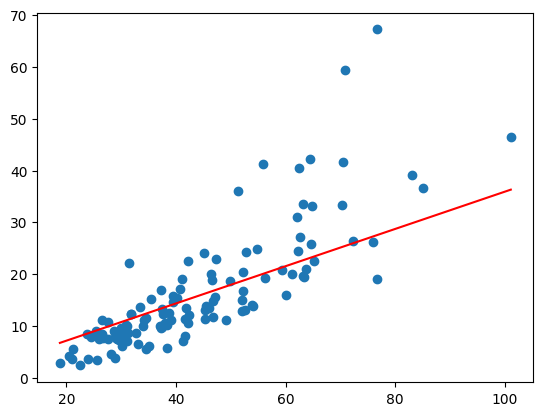

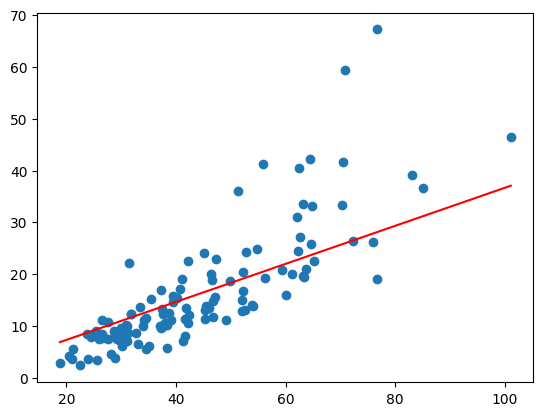

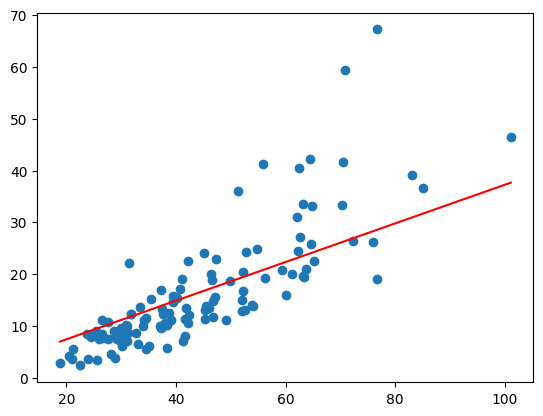

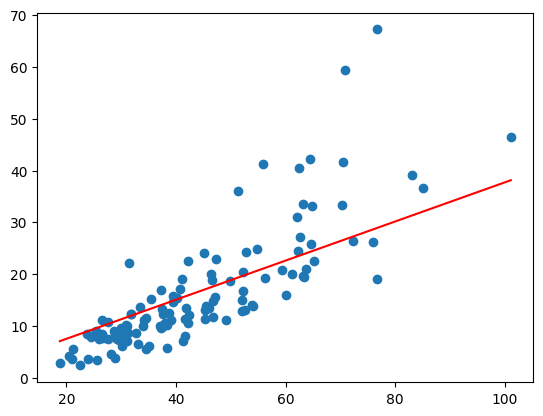

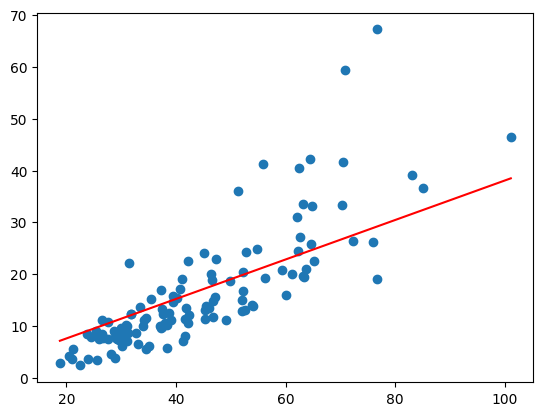

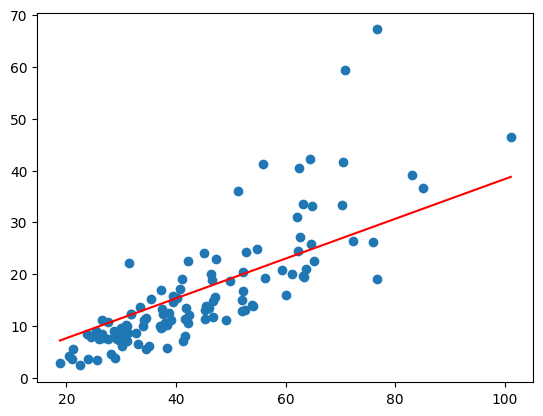

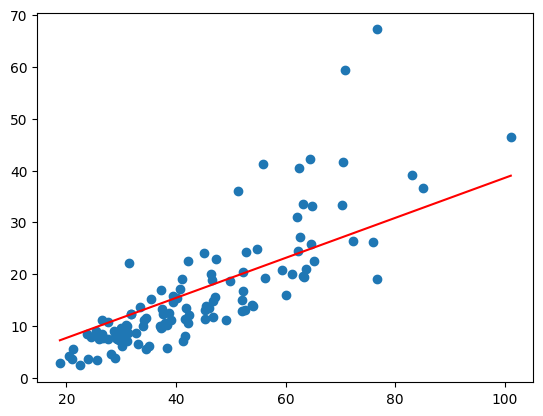

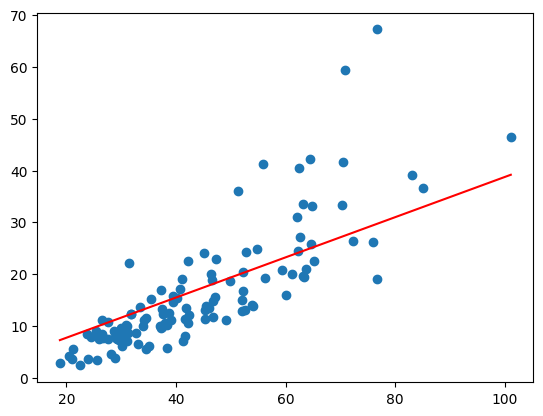

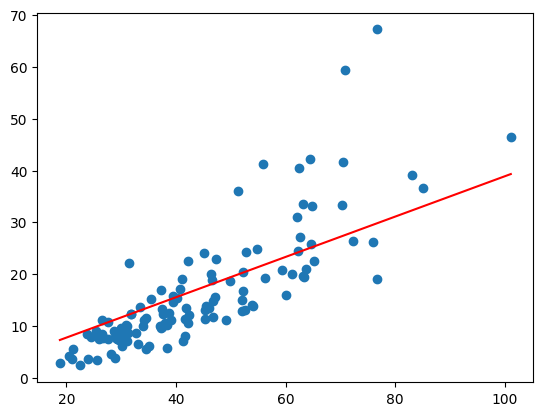

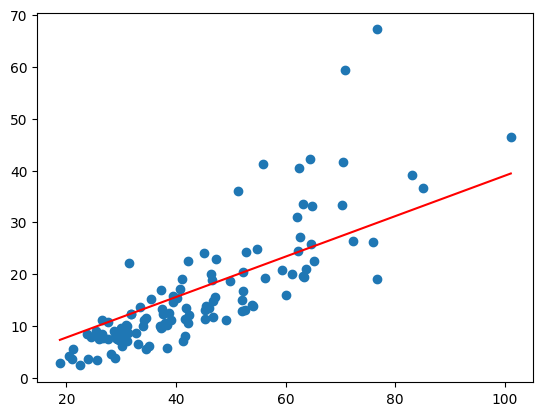

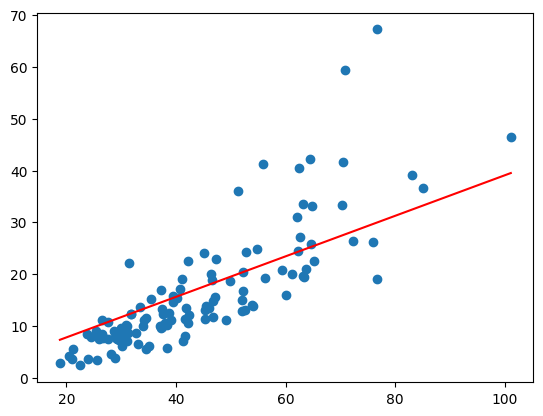

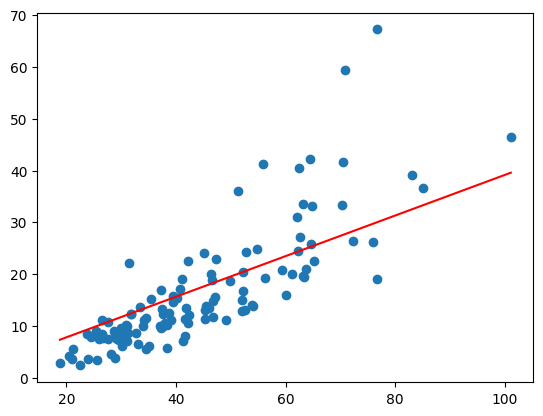

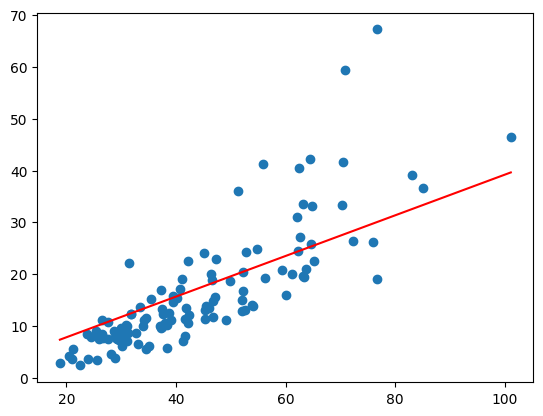

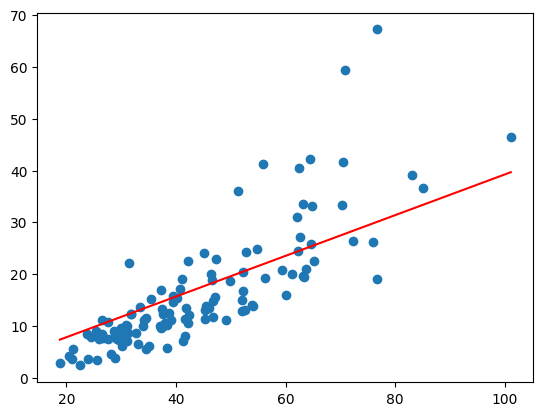

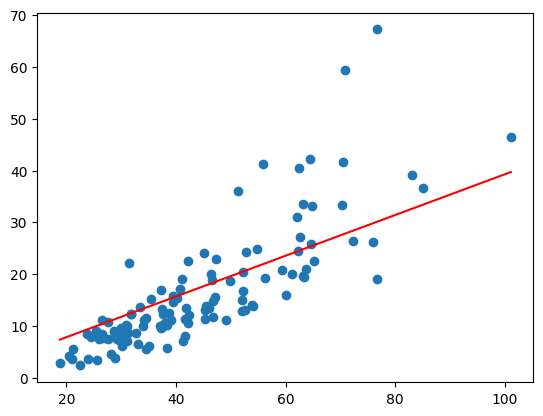

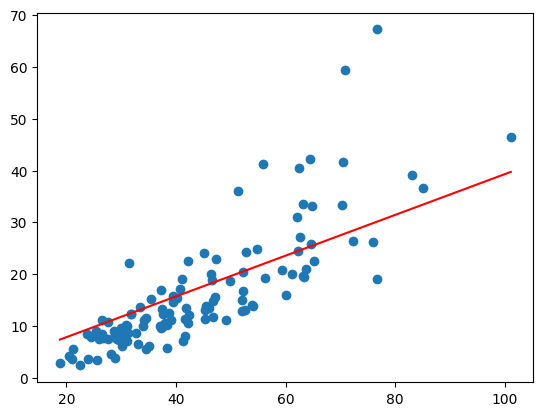

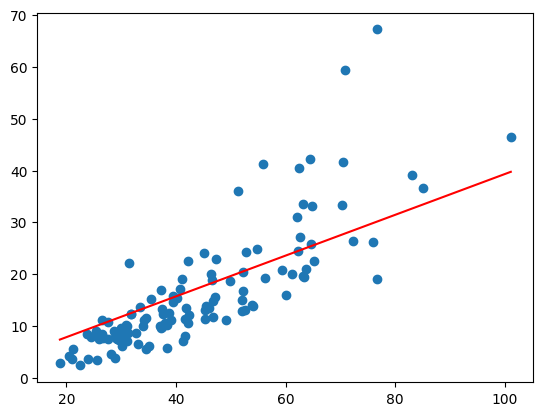

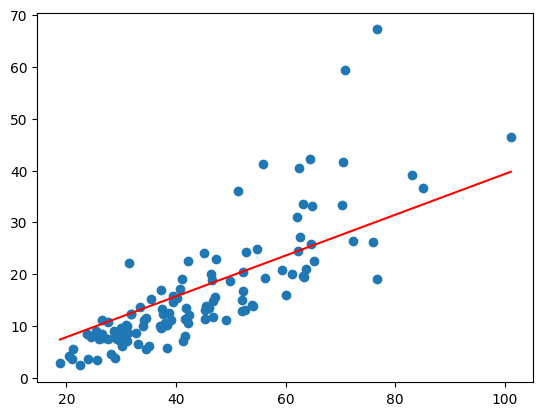

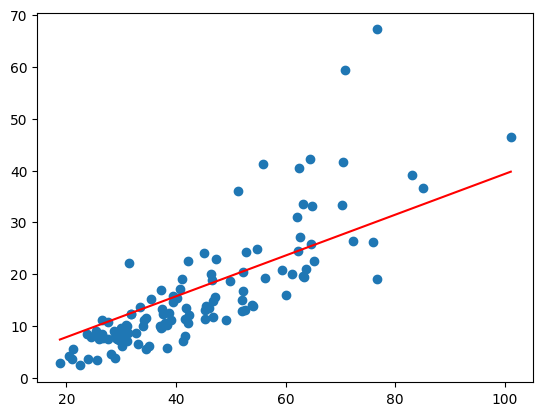

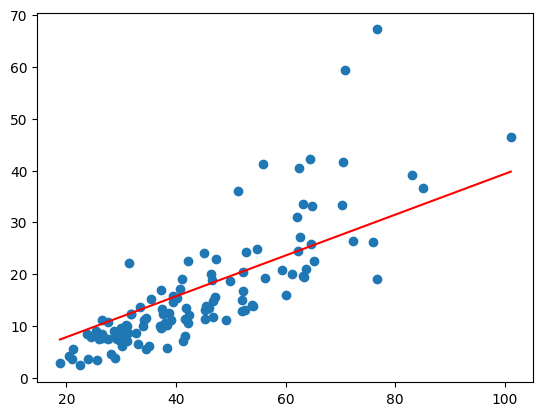

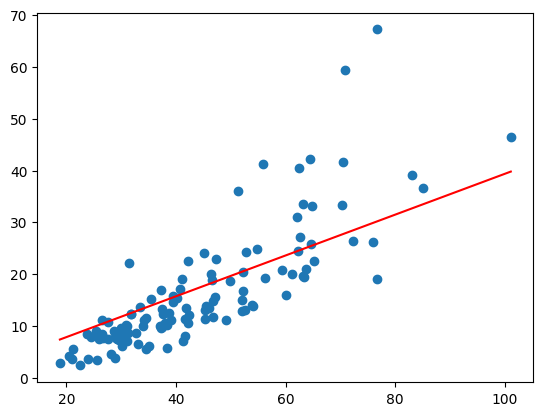

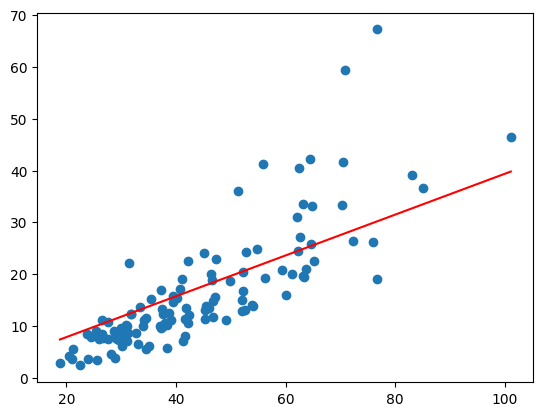

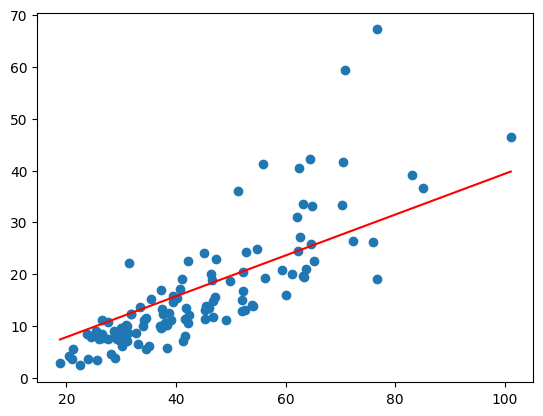

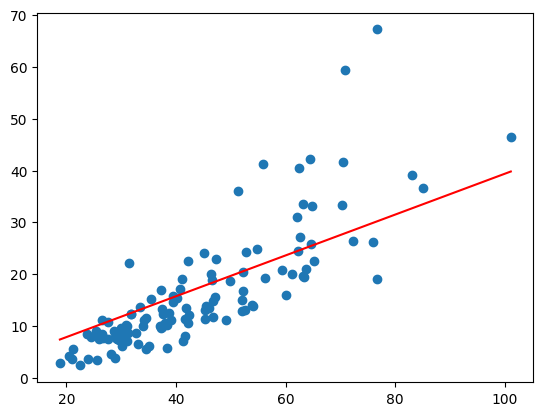

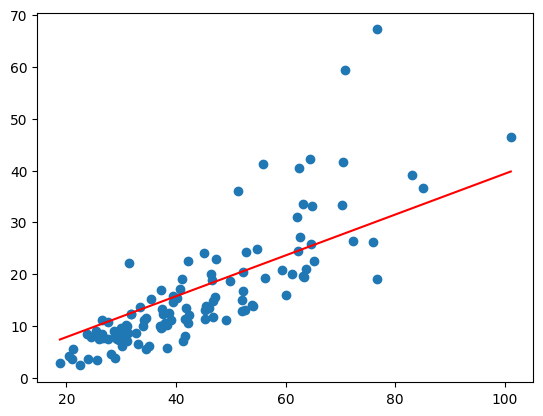

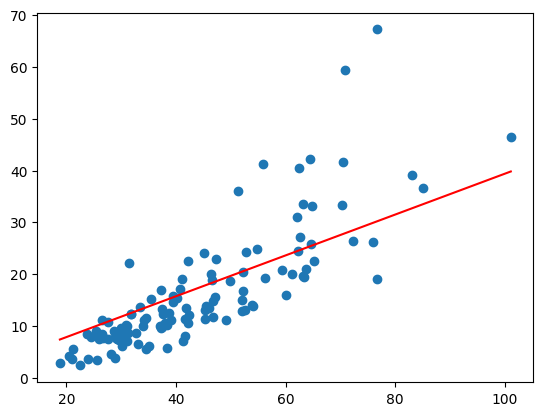

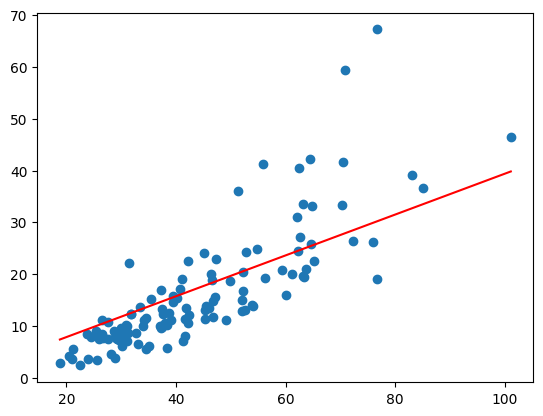

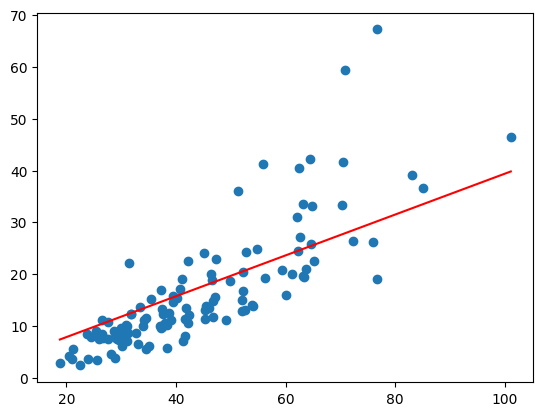

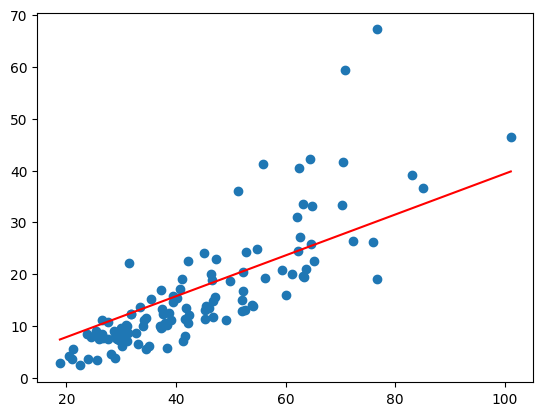

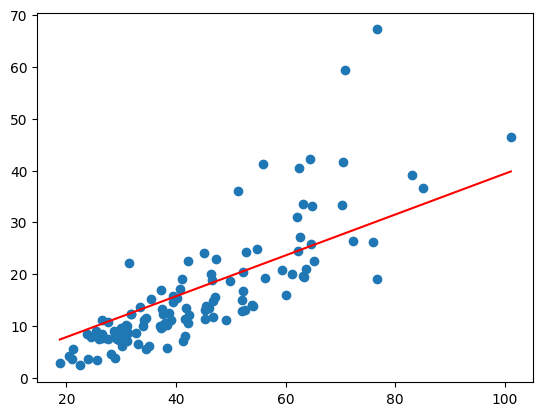

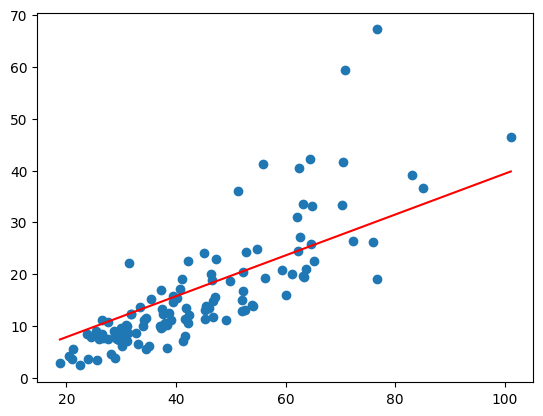

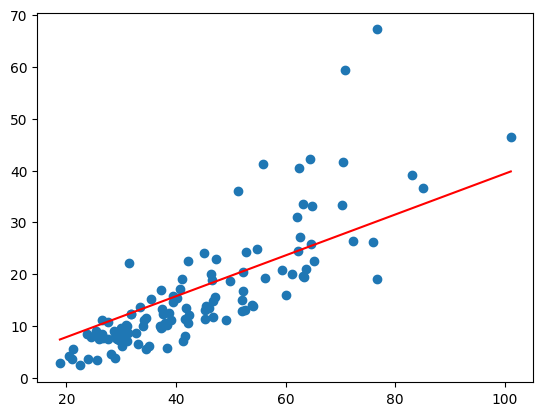

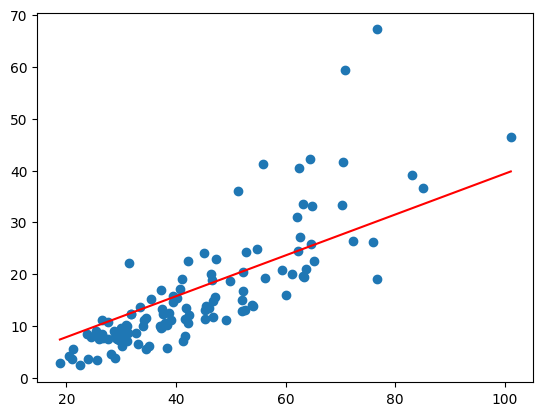

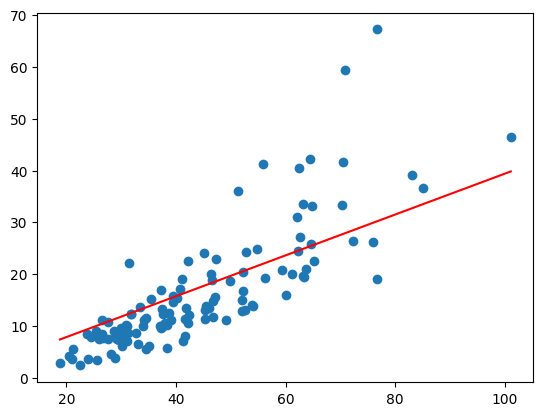

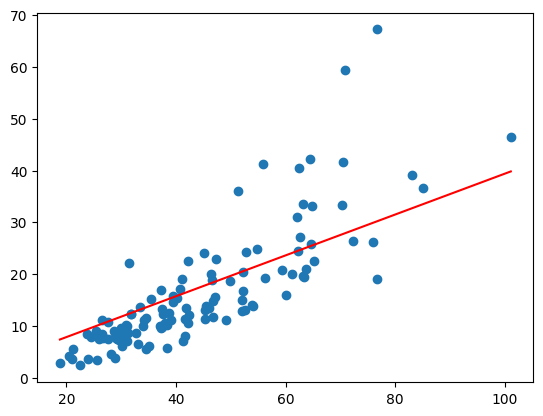

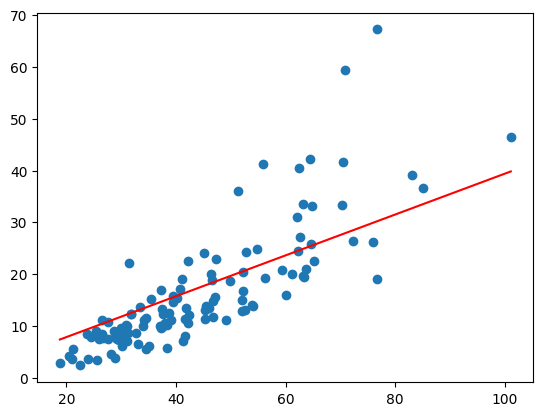

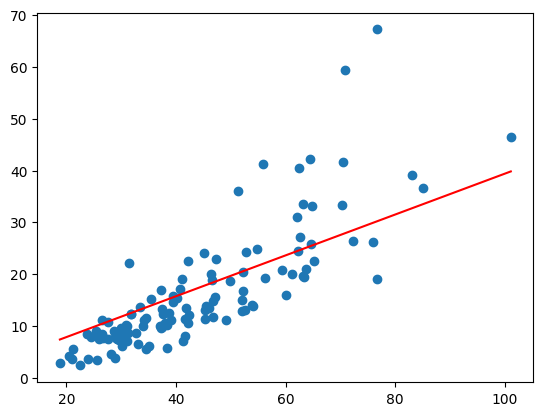

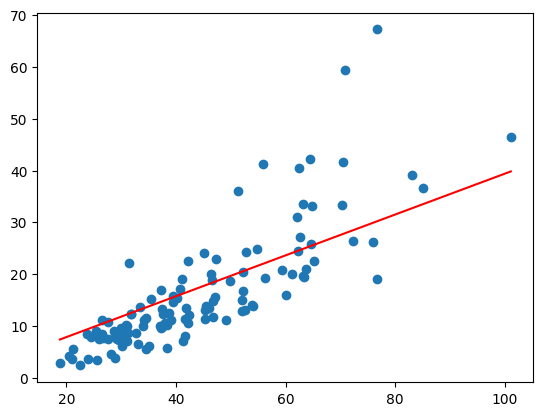

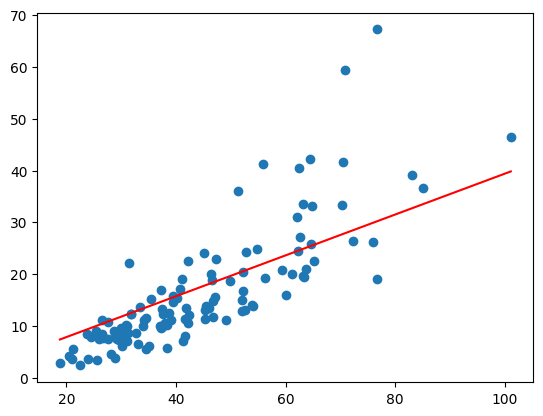

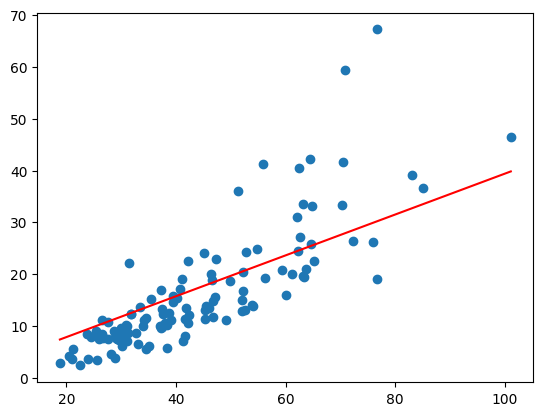

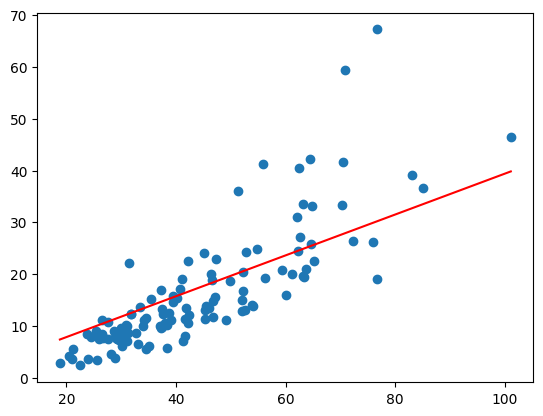

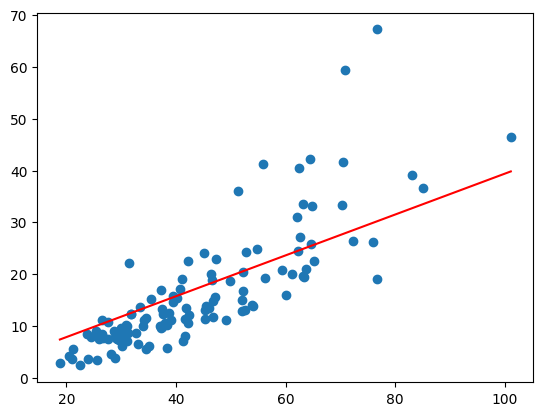

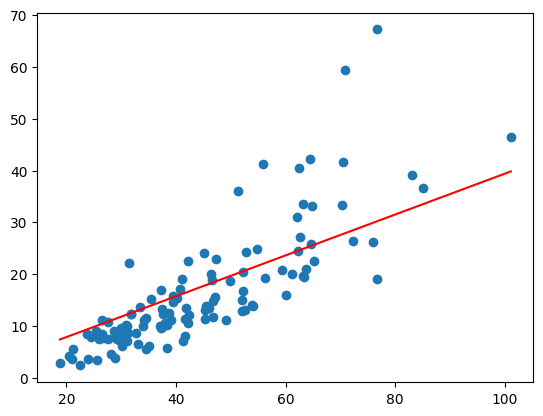

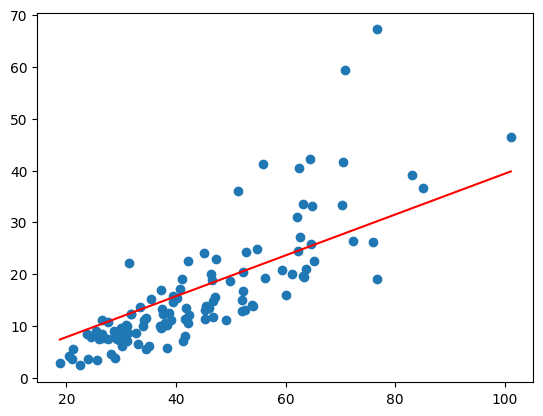

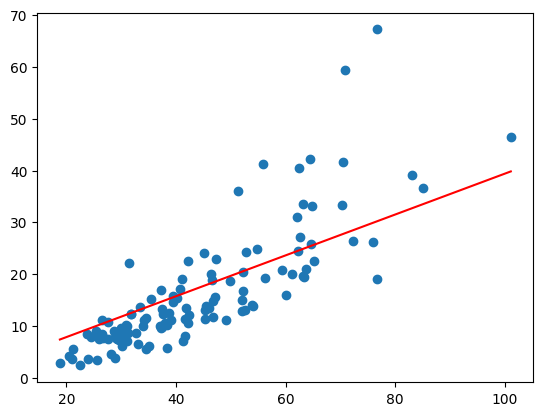

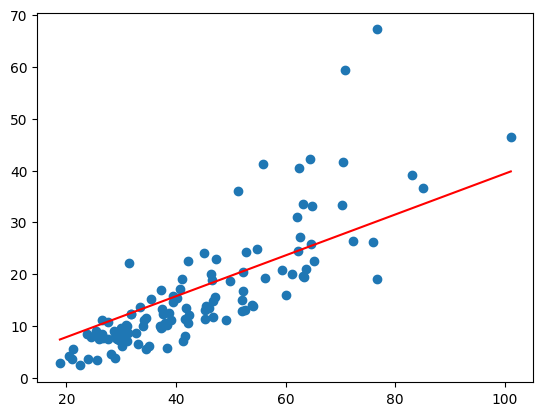

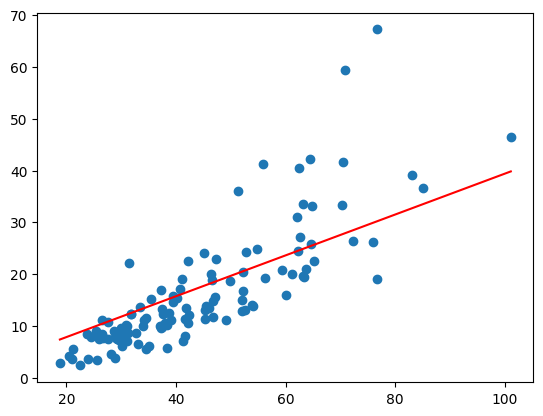

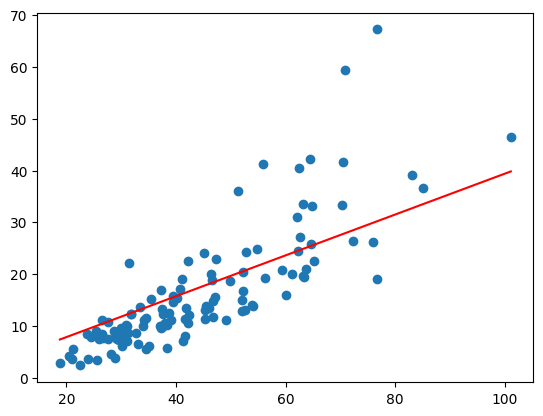

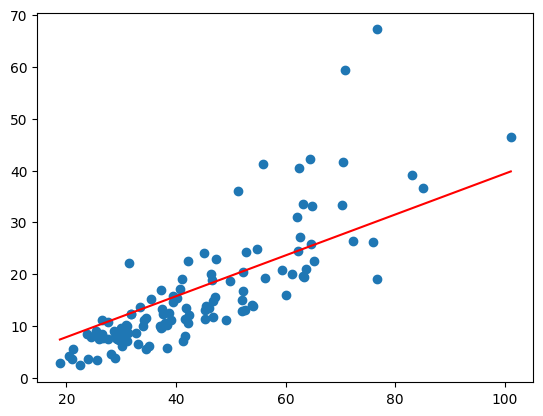

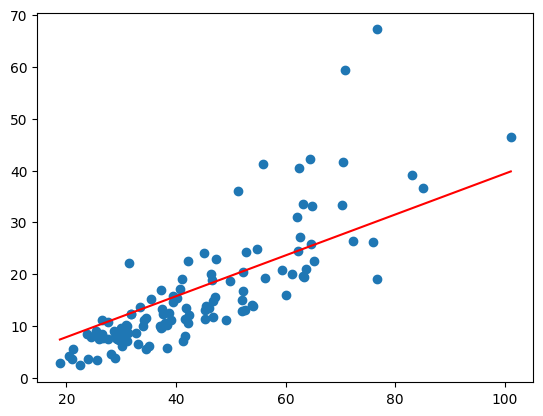

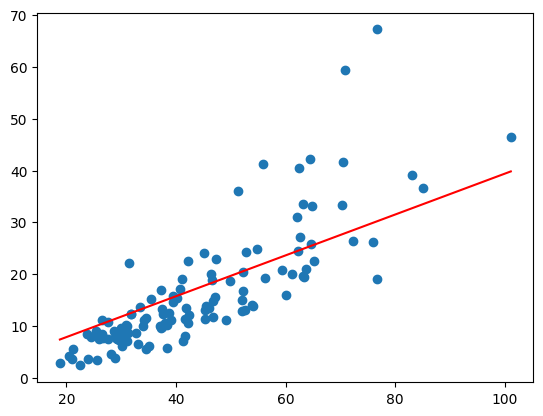

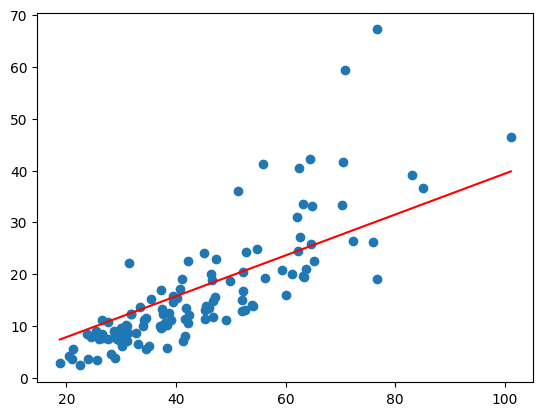

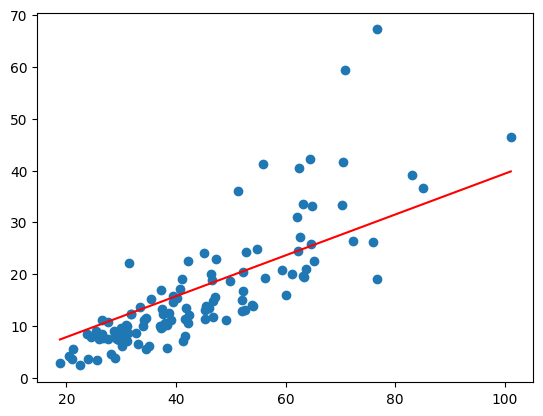

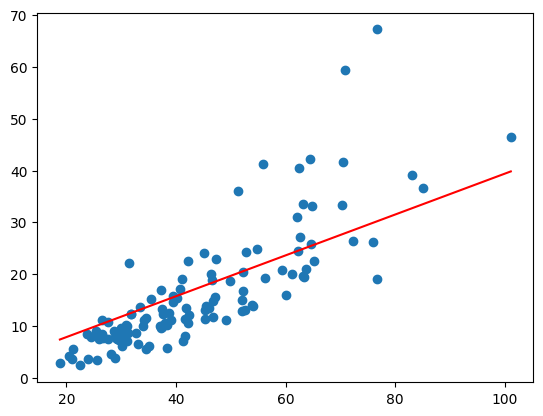

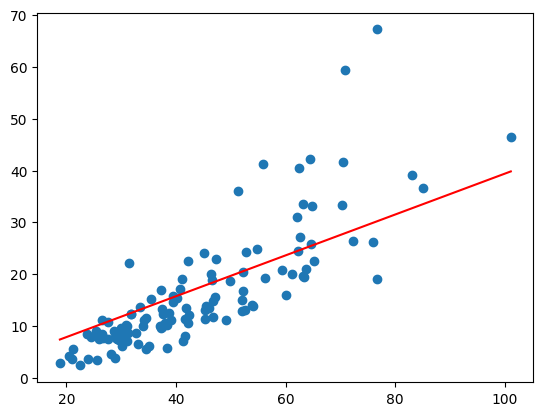

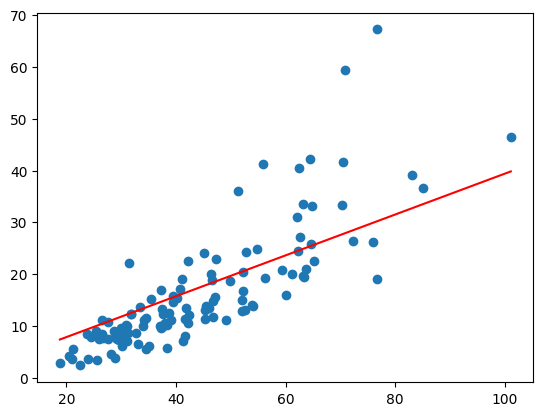

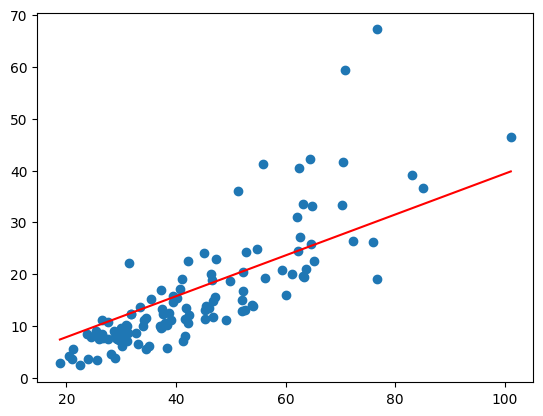

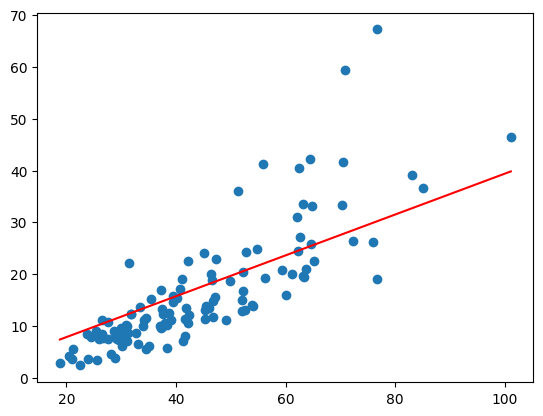

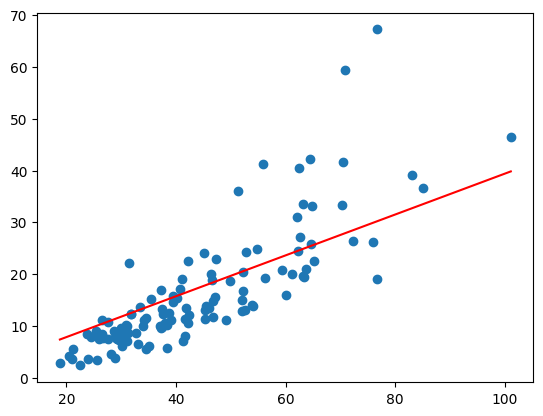

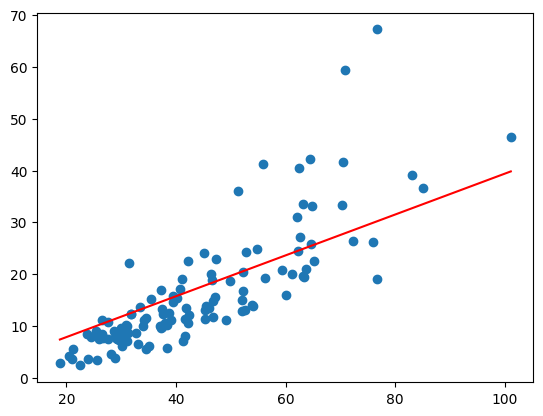

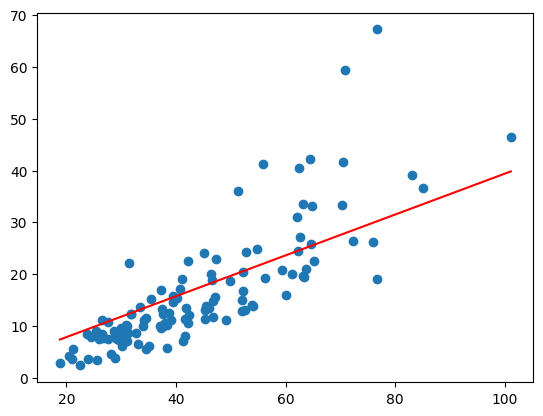

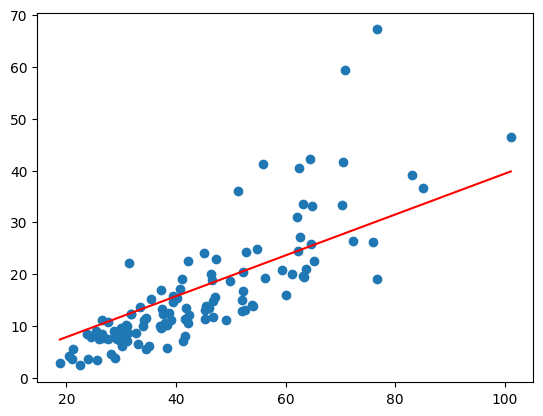

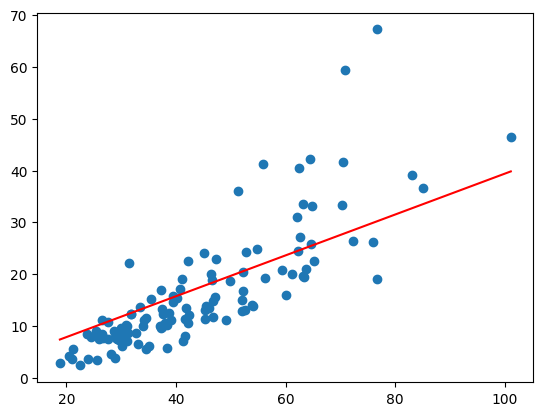

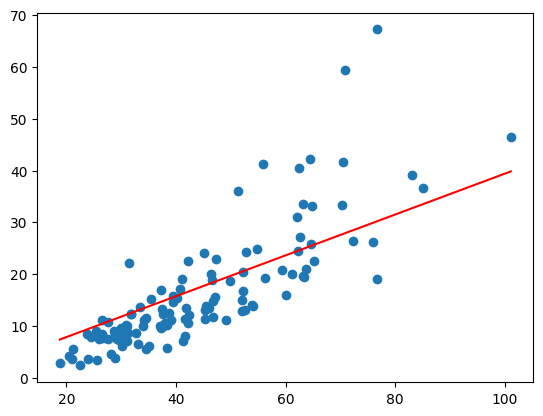

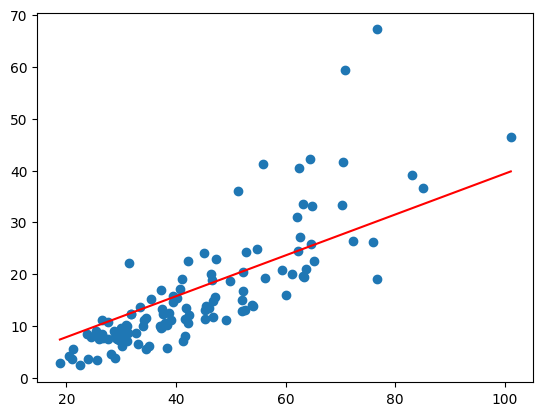

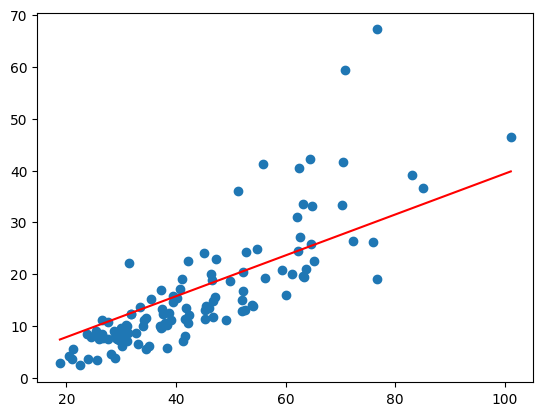

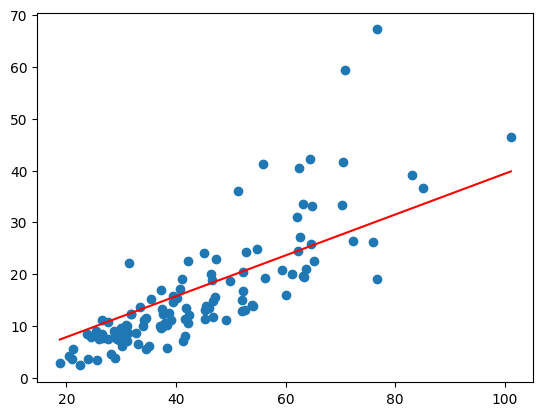

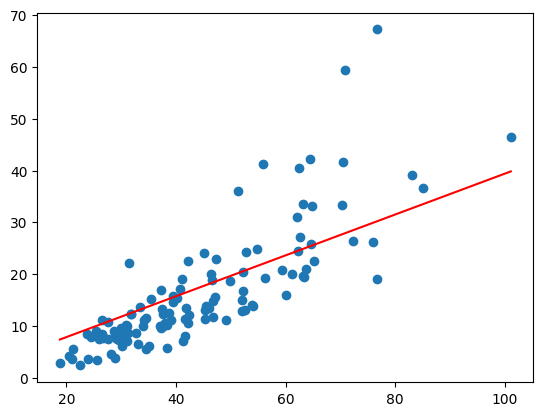

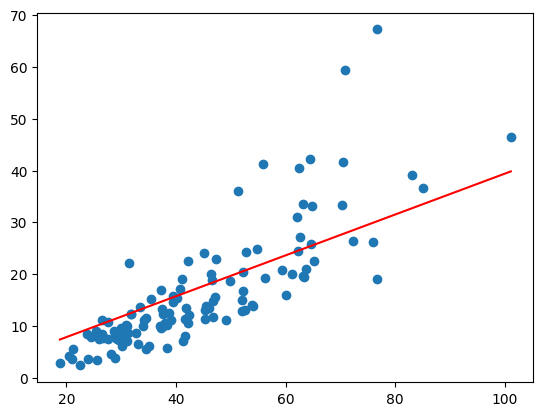

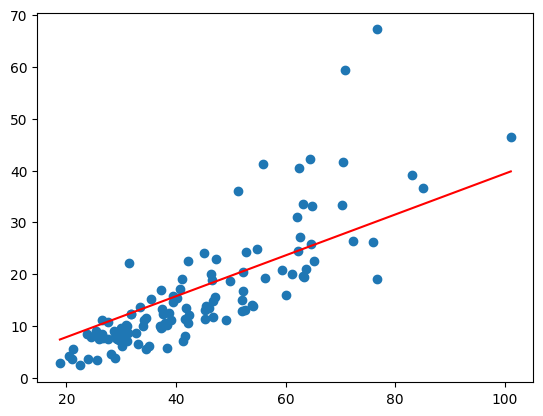

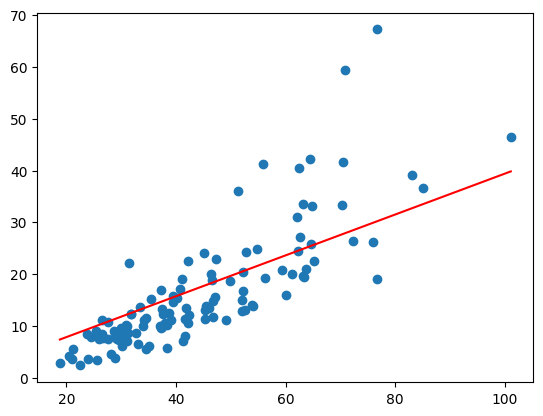

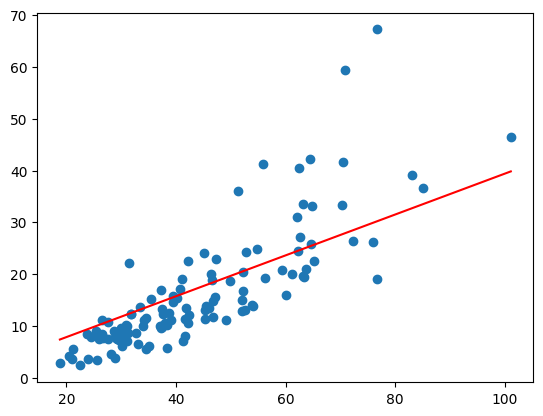

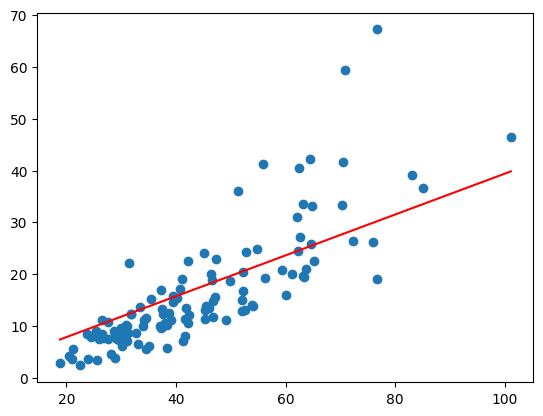

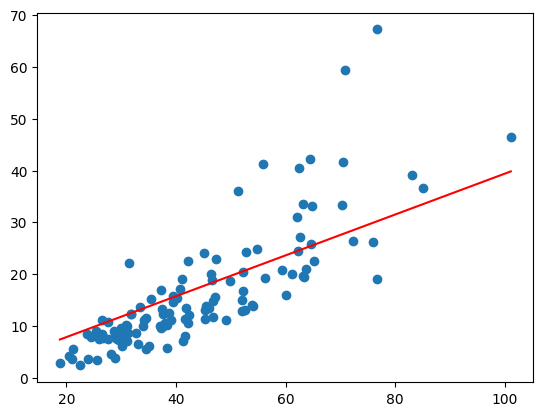

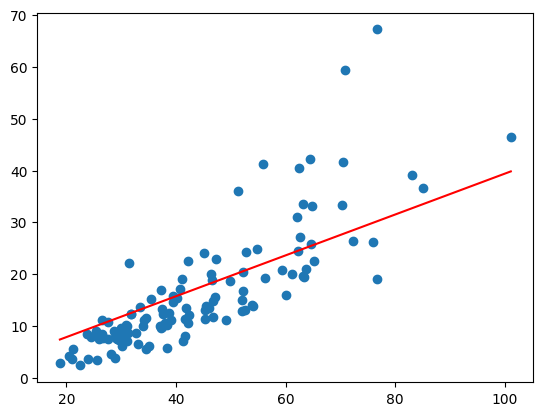

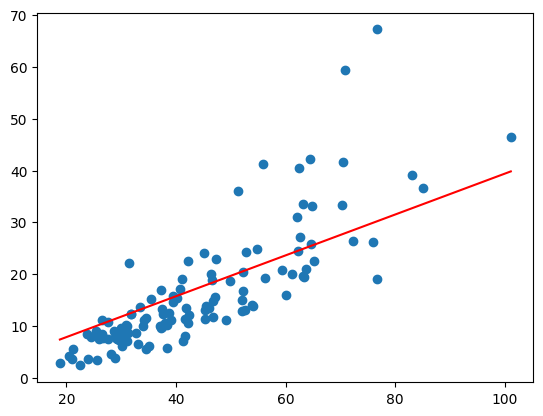

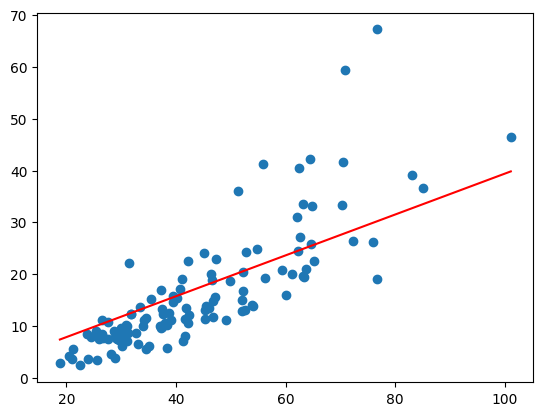

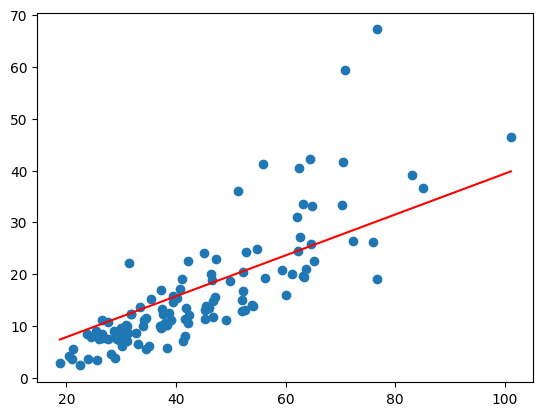

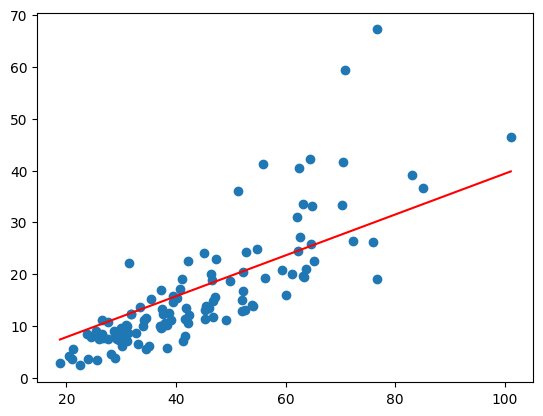

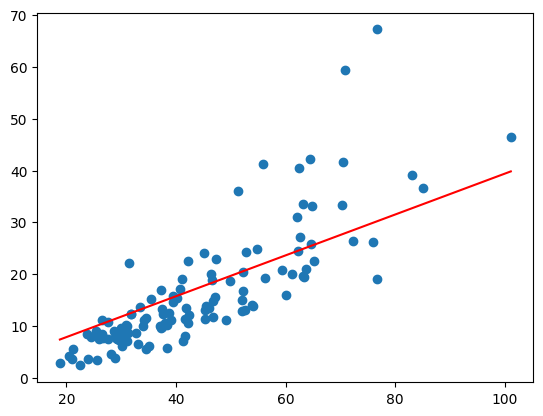

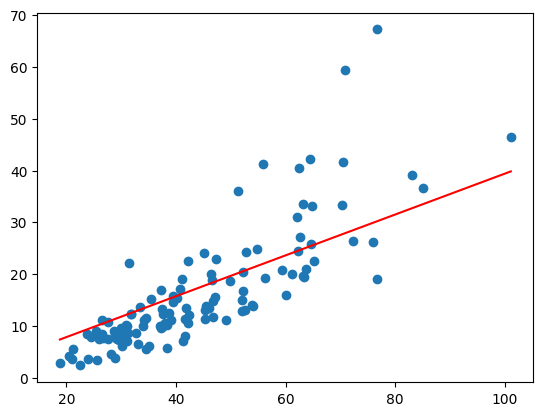

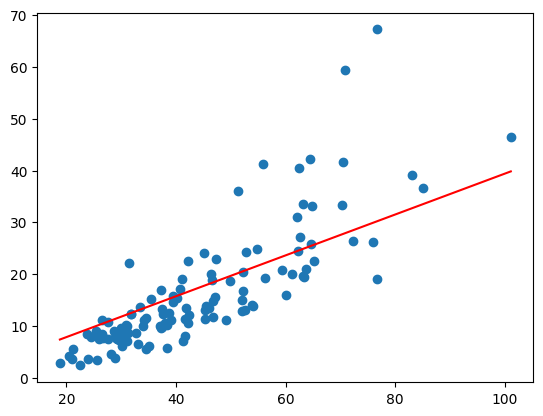

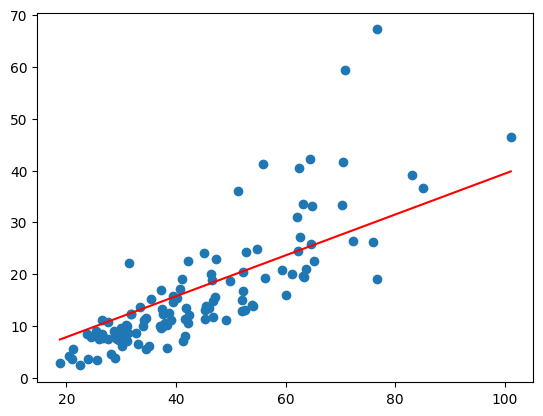

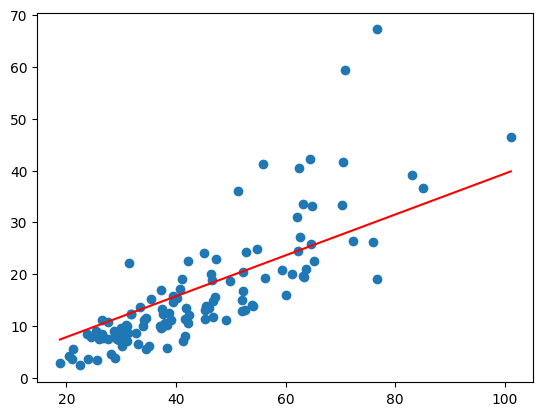

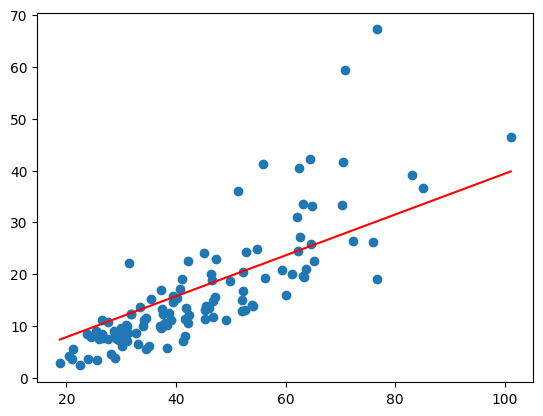

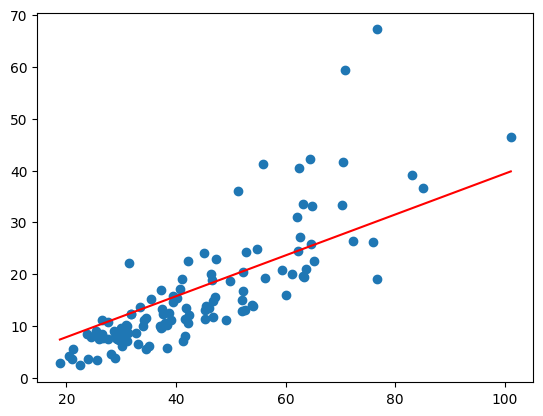

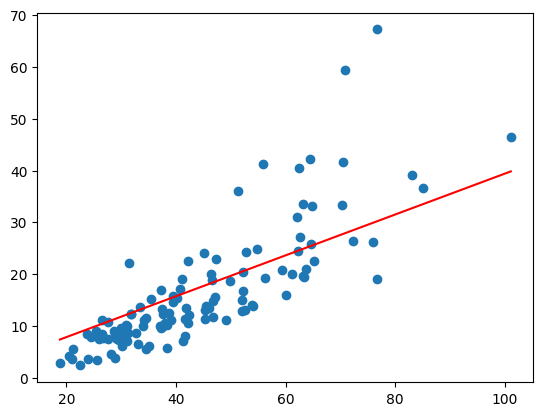

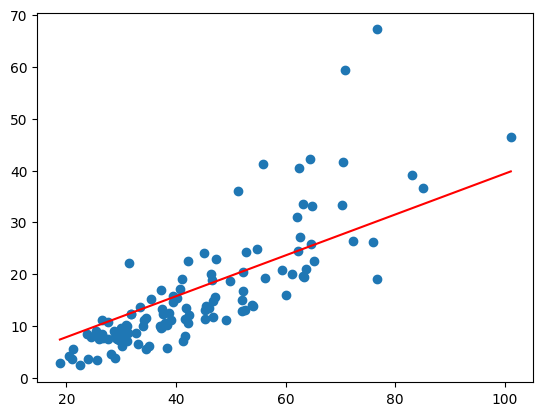

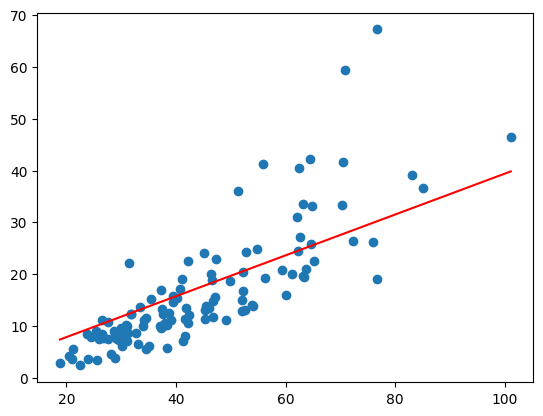

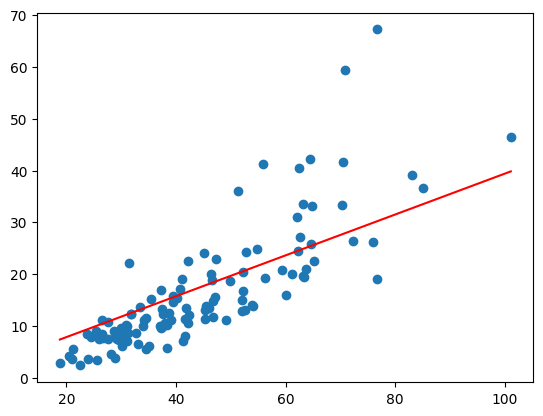

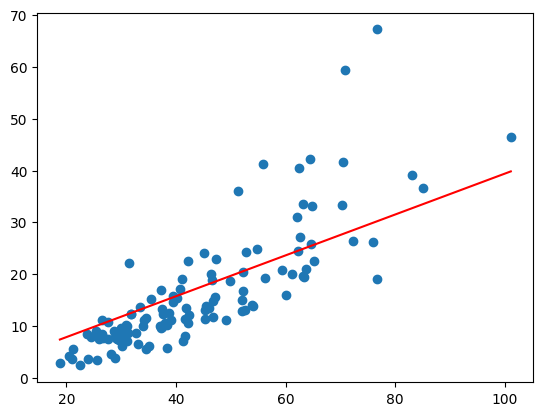

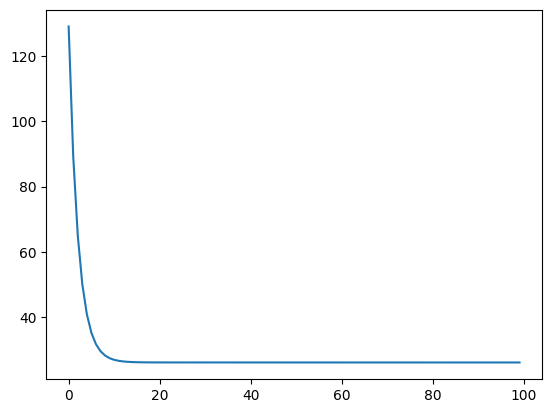

In [52]:
training(x_feature,y_feature,alpha,epochs)